In [130]:
"""Logistic Regression"""

import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    
    return  1/(1+np.exp(-z))


def logistic_loss(X, Y, W, b):
    
    (n,m) = np.shape(X)
    J = np.ones(m)
    Z = W @ X + b
    A = sigmoid(Z)  
    cost = (-1/m)*(np.log(A) @ Y +  np.log(J-A) @ (J-Y))   # loss function
    return cost
 
    
def gradients(X, Y, W, b): 
    (n,m) = np.shape(X)
    Z = W @ X + b
    A = sigmoid(Z)
    dZ = A - Y
    dW = (1/m) * dZ @ X.T    # derivative of loss w.r.t W
    db = (1/m) * np.sum(dZ)  # derivative of loss w.r.t b
    return dW, db


def gradient_descent(X, Y, alpha, num_iter):
    
    n = np.shape(X)[0]
    W = np.zeros(n)
    b = 0
    weights, residuals, costs = [[] for i in range(3)]
    
    for i in range(num_iter):
        cost = logistic_loss(X, Y, W, b)
        dW, db = gradients(X, Y, W, b)
        W = W - alpha * dW
        b = b - alpha * db
        costs.append(cost)
        weights.append(W)
        residuals.append(b) 
        
    return [W, b, weights, residuals, costs]   


In [132]:
# train the netwrok
X = np.array([[5, 6, 0.2, 6, 0.1, 0.4, 8, 4, 1, 0.3, 5],
              [4, 3, 0.3, 5, 0.5, 0.1, 4, 5, 1, 0.6, 5]])

Y = [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]      
alpha = 0.1
num_iter = 400000

[W, b, weights, residuals, costs] = gradient_descent(X, Y, alpha, num_iter)
weights = np.asarray(weights)
costs = np.asarray(costs)
residuals = np.asarray(residuals)


loss function in the last iteration = 5.960743855537844e-05


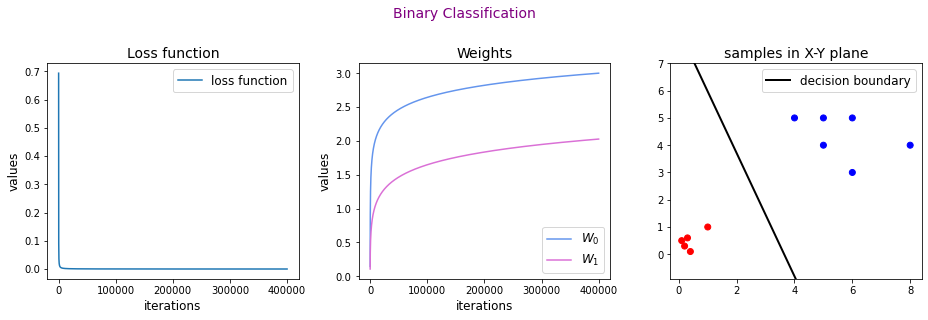

In [135]:
"""Plots""" 

def decision_boundary(x, w1, w2, b):
    y = - (w1/w2)*x - b/w2
    return y


def samples_class(Y):
    c = []  
    for i in range(len(Y)):
        if Y[i] == 0:
            c.append('r')
        else:
            c.append('b')
    return c


print('loss function in the last iteration =', costs[-1])  

# create the axes
fig, ax = plt.subplots(1,3, figsize=(13,4))

# prepare the requirements
iterations = np.linspace(0, num_iter, num_iter)
weights_color = ['cornflowerblue', 'orchid']  
x1, x2 = min(X[0]), max(X[0]) 
y1 = decision_boundary(x1, W[0], W[1], b)
y2 = decision_boundary(x2, W[0], W[1], b)

# Now plot the results
ax[0].plot(iterations, costs, label='loss function')
for i in range(len(W)):
    ax[1].plot(iterations, weights[:,i], c=weights_color[i], label='$W_{}$'.format(i))
ax[2].scatter(X[0], X[1], color=samples_class(Y))
ax[2].plot([x1, y1], [x2, y2], 'k-', lw=2, label='decision boundary')

ax[0].set_title('Loss function', fontsize=14)
ax[1].set_title('Weights', fontsize=14)
ax[2].set_title('samples in X-Y plane', fontsize=14) 
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
ax[2].legend(fontsize=12)
ax[0].set_xlabel('iterations', fontsize=12)
ax[1].set_xlabel('iterations', fontsize=12)
ax[0].set_ylabel('values', fontsize=12)
ax[1].set_ylabel('values', fontsize=12)
ax[2].set_ylim([min(X[1])-1,max(X[1])+2])
plt.suptitle('Binary Classification', size=14, color='purple', y=1.1)
plt.tight_layout()


Xtest = 
  [[ 1.   3.   3.   4.   6.   0.   0.4  3. ]
 [ 2.   4.   1.   5.   0.   6.   0.6 -4. ]]
Prediction =  [0. 1. 0. 1. 1. 0. 0. 0.]


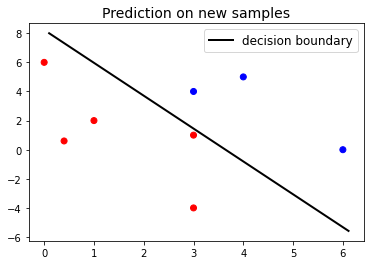

In [136]:
"""Prediction"""

Xtest = np.array([[1, 3, 3, 4, 6, 0, 0.4, 3],
                  [2, 4, 1, 5, 0, 6, 0.6, -4]])

# predict the new samples
Ypred = W @ Xtest + b

for i in range(len(Ypred)):
    if Ypred[i] > 0.5:
        Ypred[i] = 1
    else:
        Ypred[i] = 0
        
print('Xtest = \n ', Xtest)
print('Prediction = ', Ypred)

plt.scatter(Xtest[0], Xtest[1], color=samples_class(Ypred))
plt.plot([x1, y1], [x2, y2], 'k-', lw=2, label='decision boundary') 
plt.title('Prediction on new samples', fontsize=14)
plt.legend(fontsize=12)
plt.show()